In [ ]:

import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
import pandas as pd
from skimage.feature import hog
#from sklearn.manifold import 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
my_arrays_final = np.load("/content/gdrive/MyDrive/car_final_data.npz", allow_pickle=True)

In [ ]:
df= pd.DataFrame.from_dict({item: my_arrays_final[item] for item in my_arrays_final.files}, orient='index')

In [ ]:
df = df.transpose()

In [ ]:
df1 = df[(df.index % 5 == 0 )]

HOG Feature Extraction

In [ ]:
from skimage import exposure

In [ ]:
test_img = df1['images'][6000]

In [ ]:
fd, hog_image = hog(test_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

<ipython-input-46-0abcf5195736>:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(test_img, orientations=9, pixels_per_cell=(8, 8),


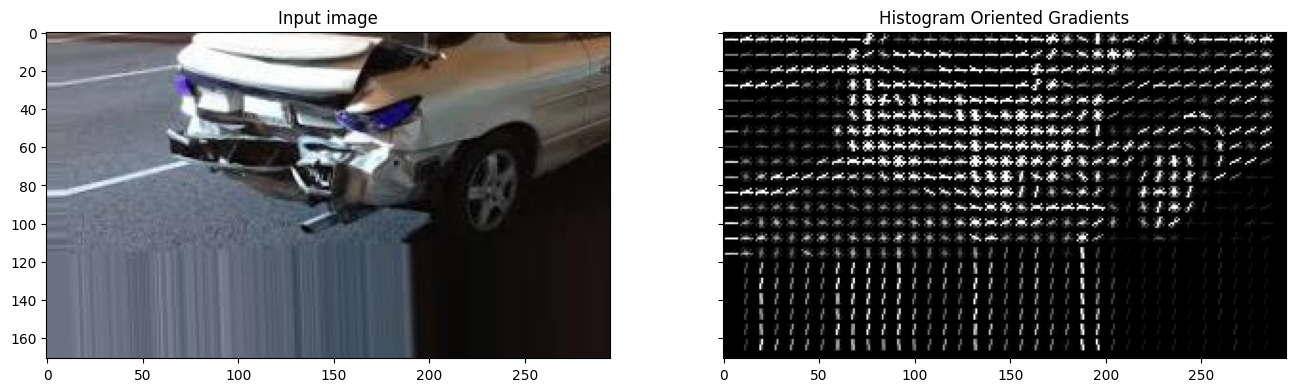

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(test_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram Oriented Gradients')

plt.show()

In [ ]:
def hog_FE(image) :
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    return fd if fd is not None else np.array([]).reshape(0, 128)

In [ ]:
features_hog = []
X_img = df1['images']
labels = df1['labels']
size = (300,300,3)

In [ ]:
for image in X_img:
    hog_img = hog_FE(image)
    hfe = np.hstack([hog_img])
    hfe.resize(size)
    features_hog.append(hfe)

In [ ]:
X_train = np.array(features_hog)
X_train = X_train.reshape(len(X_train),300*300*3)
Y_train = np.array(labels).astype('int')

UMAP

In [ ]:
umap_test = umap.UMAP()
umap_f = umap_test.fit_transform(X_train)

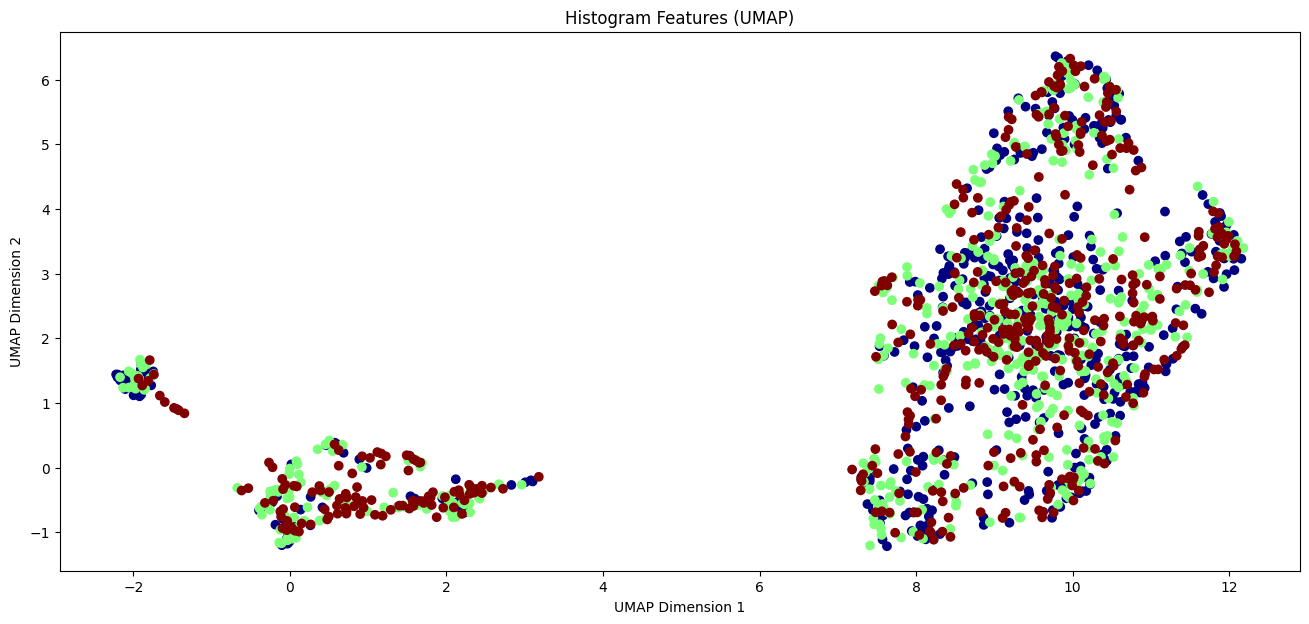

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(16,7))
plt.rcParams["image.cmap"] = "jet"
plt.scatter(umap_f[:, 0], umap_f[:, 1], c=Y_train)
plt.title('Histogram Features (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
max_depth = list(range(1, 15))
scores = []
for i in max_depth:
    dt = RandomForestClassifier(max_depth=i, criterion='entropy')
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))


NameError: ignored

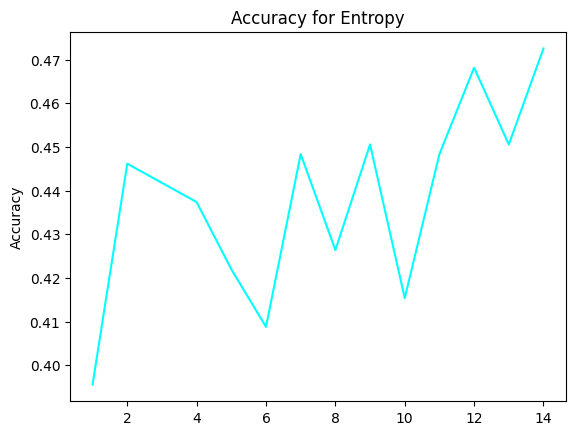

In [ ]:
plt.plot(max_depth, scores, c = 'cyan')
plt.title('Accuracy for Entropy')
plt.ylabel('Accuracy')
plt.show()

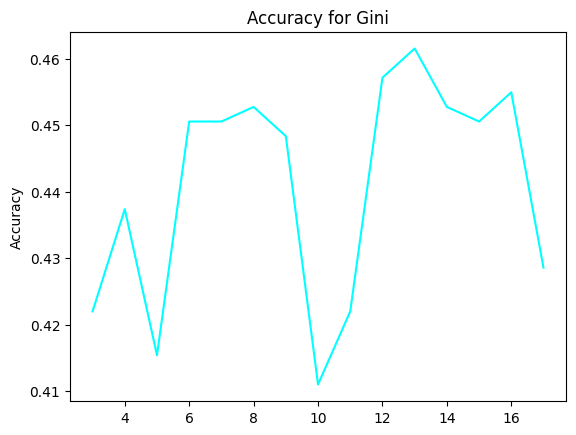

In [ ]:
max_depth = list(range(3, 18))
scores = []
for i in max_depth:
    dt = RandomForestClassifier(max_depth=i, criterion='gini')
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
plt.plot(max_depth, scores, c = 'cyan')
plt.title('Accuracy for Gini')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
rf1=RandomForestClassifier(criterion= 'entropy', max_depth= 9)

In [ ]:
rf1.fit(X_train, y_train)
pred=rf1.predict(X_test)
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))

Accuracy for Random Forest:  0.47183098591549294


SIFT Feature Extraction

In [ ]:

sift = cv2.SIFT_create()



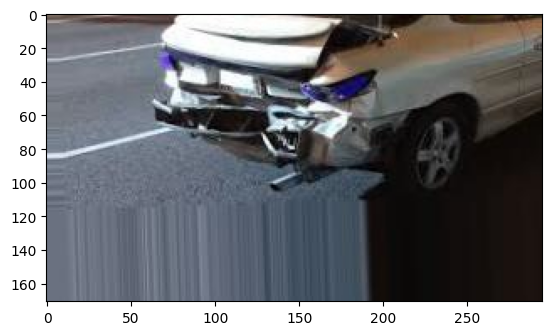

In [ ]:
from matplotlib import pyplot as plt
test_img = df1['images'][6000]
plt.imshow(test_img)

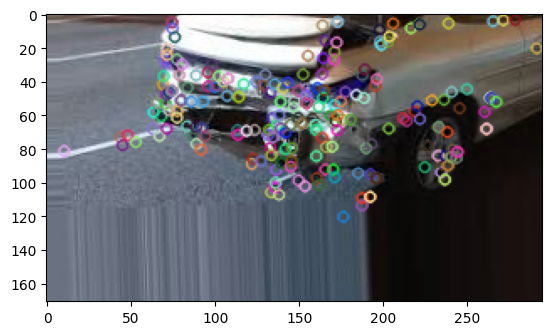

In [ ]:
#Test

keypoints, descriptors = sift.detectAndCompute(test_img,None)
img = cv2.drawKeypoints(test_img,keypoints,test_img)
plt.imshow(img)

In [ ]:
def fe_sift(image) :
    keyp, desc = sift.detectAndCompute(image, None)
    return desc if desc is not None else np.array([]).reshape(0, 128)

In [ ]:
features = []
X_img = df1['images']
labels = df1['labels']
sift_size = (500,500,3)


In [ ]:
for image in X_img:
    sift_1 = fe_sift(image)
    feature = np.hstack([sift_1])
    feature.resize(sift_size)
    features.append(feature)

In [ ]:
X_train = np.array(features)
X_train = X_train.reshape(len(X_train),500*500*3)
Y_train = np.array(labels).astype('int')

UMAP

In [ ]:
import umap.umap_ as umap

In [ ]:
umap_test = umap.UMAP()
umap_f = umap_test.fit_transform(X_train)

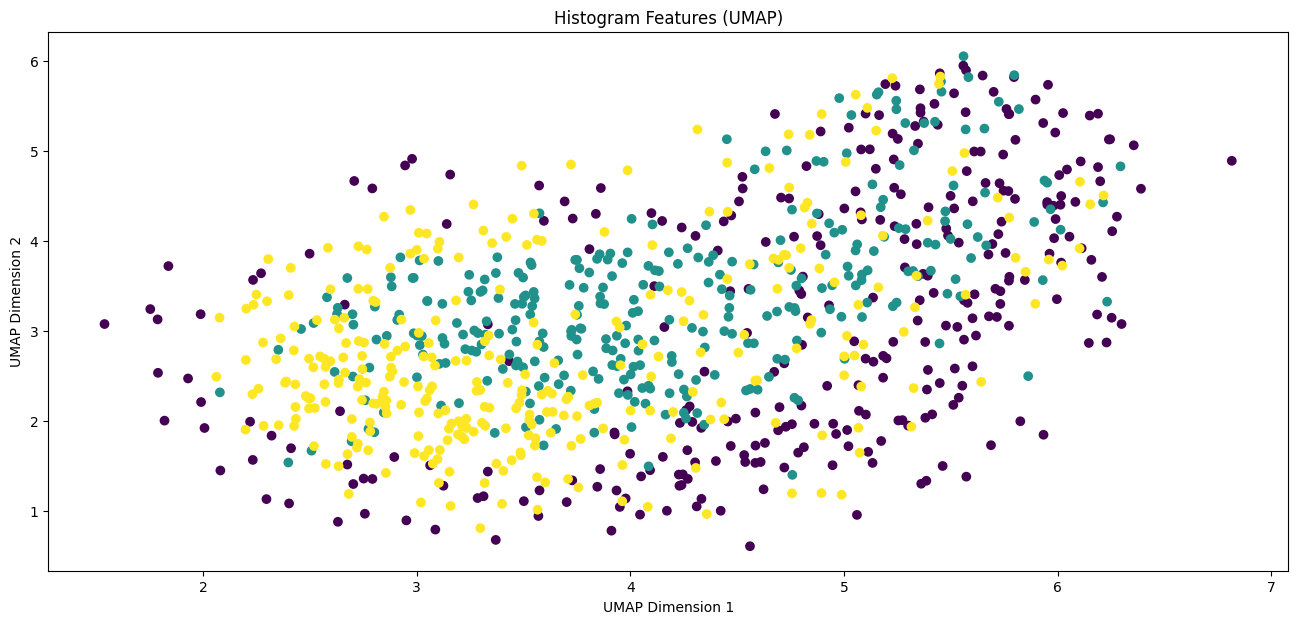

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(16,7))
plt.scatter(umap_f[:, 0], umap_f[:, 1], c=Y_train)
plt.title('Histogram Features (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

Random Forest Model


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [ ]:
max_depth = list(range(3, 18))
scores = []
for i in max_depth:
    dt = RandomForestClassifier(max_depth=i, criterion='entropy', n_estimators=500)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))


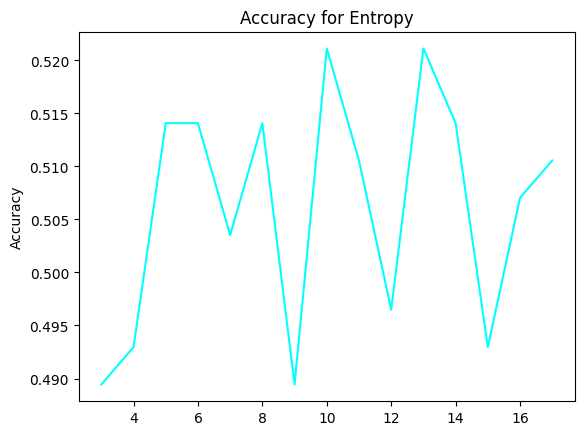

In [ ]:
plt.plot(max_depth, scores, c = 'cyan')
plt.title('Accuracy for Entropy')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
param_grid = { 
    'n_estimators': [200, 400, 500],
    'max_depth' : range(1,6),
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42)
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6),
                         'n_estimators': [200, 400, 500]})

In [ ]:
cv_rf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 500}

In [ ]:
rf1=RandomForestClassifier(max_depth=5, criterion='gini', n_estimators=500)

In [ ]:
rf1.fit(X_train, y_train)
pred=rf1.predict(X_test)
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))

Accuracy for Random Forest:  0.49538461538461537


Working on Blob Detection

In [ ]:
from skimage.feature import blob_dog

In [ ]:
first_img = df1['images'][0]

In [ ]:
blobs = blob_dog(first_img, max_sigma=30, threshold=0.01)


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


In [ ]:
def blobs_FE(image) :
    blobs = blob_dog(image, max_sigma=30, threshold=0.01)
    return blobs if blobs is not None else np.array([]).reshape(0, 128)

In [ ]:
features = []
X_img = df1['images']
labels = df1['labels']
sift_size_blobs = (300,300,3)

In [ ]:
for image in X_img:
    sift_1 = blobs_FE(image)
    feature = np.hstack([sift_1])
    feature.resize(sift_size_blobs)
    features.append(feature)

In [ ]:
X_train = np.array(features)
X_train = X_train.reshape(len(X_train),300*300*3)
Y_train = np.array(labels).astype('int')

Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [ ]:
max_depth = list(range(3, 18))
scores = []
for i in max_depth:
    dt = RandomForestClassifier(max_depth=i, criterion='entropy', n_estimators=500)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

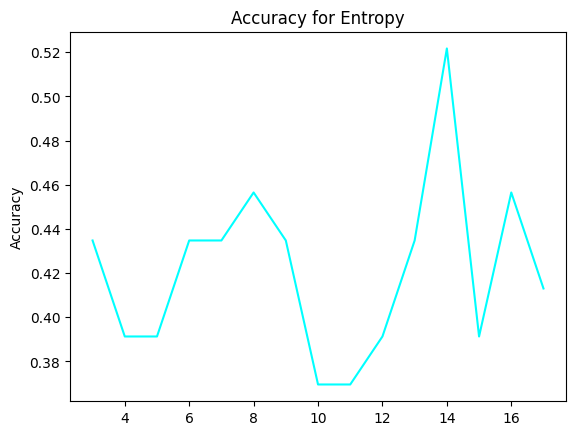

In [ ]:
plt.plot(max_depth, scores, c = 'cyan')
plt.title('Accuracy for Entropy')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
max_depth = list(range(3, 18))
scores = []
for i in max_depth:
    dt = RandomForestClassifier(max_depth=i, criterion='gini', n_estimators=500)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

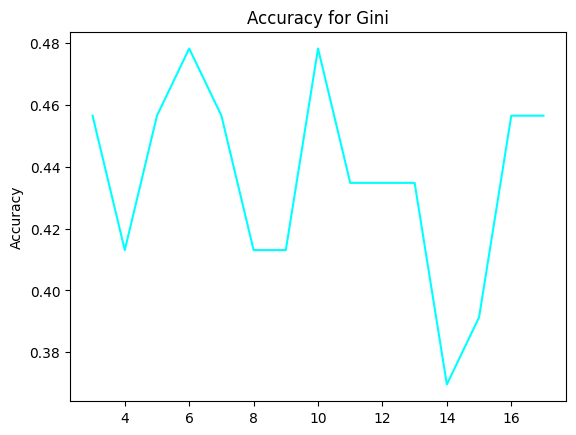

In [ ]:
plt.plot(max_depth, scores, c = 'cyan')
plt.title('Accuracy for Gini')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = { 
    'n_estimators': [100, 500],
    'max_depth' : range(4,14),
    'criterion' :['gini', 'entropy']
}

In [ ]:
rf = RandomForestClassifier(random_state=42)
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 14),
                         'n_estimators': [100, 500]})

In [ ]:
cv_rf.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 100}

In [ ]:
rf1=RandomForestClassifier(max_depth=14, criterion='entropy', n_estimators=100)

In [ ]:
rf1.fit(X_train, y_train)
pred=rf1.predict(X_test)
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))

Accuracy for Random Forest:  0.43478260869565216
